<a href="https://colab.research.google.com/github/gudals6676/Deep_Learning/blob/main/06_%EC%82%AC%EB%9E%8C(%EA%B0%95%EC%A4%80%2C_%EC%88%98%ED%99%98)%EC%96%BC%EA%B5%B4_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 강준, 수환씨 얼굴을 분류하는 이진분류 모델을 만들어보자!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PIL : 이미지를 불러오게끔 해주는 라이브러리
from PIL import Image

In [ ]:
# 이미지를 가져와서 흑백으로 전환
# convert -> L : 흑백 , RGB : 컬러
img = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차_딥러닝/data/Class 2-samples (2)/0.jpg").convert("L")

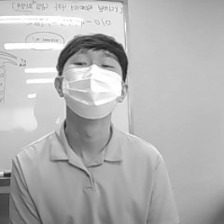

In [ ]:
img

In [ ]:
# 이미지 데이터를 numpy 배열로 변환
# 기계가 인식할 수 있도록 이미지 데이터를 숫자 데이터로 변환시켜줘야 하기 때문
# -> 가로(행), 세로(열) 픽셀 수 만큼 변경을 시켜줌
img_array = np.array(img)

# 손글씨, 패션데이터는 keras에서 제공하는 학습용 데이터이기 때문에 사전에 수치형태로 변환되어져 있음

In [ ]:
img_array.shape

(224, 224)

In [ ]:
img_array

array([[155, 157, 159, ..., 157, 157, 157],
       [192, 192, 193, ..., 158, 158, 158],
       [192, 193, 193, ..., 159, 159, 159],
       ...,
       [ 77,  78,  79, ...,  95,  94,  94],
       [ 77,  77,  78, ...,  97,  96,  96],
       [ 77,  77,  78, ...,  98,  98,  97]], dtype=uint8)

In [ ]:
# 반복문 실행시 어느정도 실행되고 있는지 %로 알려주는 라이브러리
from tqdm import tqdm

In [ ]:
# 데이터 셋 구성(인물별 200장씩)
class1_list = [] # 강준 데이터 저장
class2_list = [] # 수환 데이터 저장

for i in tqdm(range(0,200,1)):
  # 1. 수환 데이터 작업
  # 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후에 img1이라는 변수에 담음
  img1 = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차_딥러닝/data/Class 2-samples (2)/"+str(i)+".jpg").convert("L")
  # 이미지 데이터가 저장된 img1을 numpy배열로 변환
  img_arr1 = np.array(img1)
  # numpy 배열로 변환된 데이터를 빈 리스트에 하나씩 추가해주기
  class1_list.append(img_arr1)

  # 1. 강준 데이터 작업
  # 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후에 img1이라는 변수에 담음
  img2 = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차_딥러닝/data/Class 1-samples/"+str(i)+".jpg").convert("L")
  # 이미지 데이터가 저장된 img1을 numpy배열로 변환
  img_arr2 = np.array(img2)
  # numpy 배열로 변환된 데이터를 빈 리스트에 하나씩 추가해주기
  class2_list.append(img_arr2)

100%|██████████| 200/200 [00:00<00:00, 258.99it/s]


In [ ]:
class1_list

[array([[155, 157, 159, ..., 157, 157, 157],
        [192, 192, 193, ..., 158, 158, 158],
        [192, 193, 193, ..., 159, 159, 159],
        ...,
        [ 77,  78,  79, ...,  95,  94,  94],
        [ 77,  77,  78, ...,  97,  96,  96],
        [ 77,  77,  78, ...,  98,  98,  97]], dtype=uint8),
 array([[153, 155, 158, ..., 157, 157, 157],
        [188, 189, 191, ..., 158, 158, 158],
        [191, 191, 192, ..., 159, 159, 159],
        ...,
        [ 76,  77,  79, ...,  95,  94,  94],
        [ 75,  77,  78, ...,  96,  96,  95],
        [ 75,  76,  78, ...,  97,  96,  95]], dtype=uint8),
 array([[149, 150, 153, ..., 157, 157, 157],
        [192, 193, 193, ..., 158, 158, 158],
        [192, 192, 192, ..., 159, 159, 159],
        ...,
        [ 77,  78,  79, ...,  94,  93,  93],
        [ 77,  78,  79, ...,  95,  96,  96],
        [ 77,  78,  79, ...,  96,  98,  98]], dtype=uint8),
 array([[155, 156, 159, ..., 156, 155, 155],
        [191, 191, 192, ..., 157, 157, 156],
        [193, 19

In [ ]:
# 리스트 자체도 numpy배열로 변환
# -> 사진 하나하나도 numpy배열로, 사진 데이터가 담긴 리스트도 numpy배열로 변환시켜주어야 함!

class1_numpy = np.array(class1_list) # 수환
class2_numpy = np.array(class2_list) # 강준

# concatenate : 두 배열을 순서대로 붙여주기(문제 데이터 생성)
data = np.concatenate((class1_numpy, class2_numpy))

In [ ]:
data.shape
# 강준 200 + 수환 200 , 총 400개의 이미지 데이터가 수치로 변환되어서 data에 담김

(400, 224, 224)

In [ ]:
# 정답 데이터 만들기(문제와 정답의 순서를 일정하게 맞춰줘야함)
# 0 : 수환 데이터 정답, 1 : 강준 데이터 정답
target = np.array([0]*200 + [1] * 200)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
target.shape

(400,)

### 강준, 수환 이미지 데이터를 분류하는 신경망 모델 만들기

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target,
                                                    test_size = 0.2,
                                                    random_state=99
                                                    )

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 224, 224)
(80, 224, 224)
(320,)
(80,)


In [ ]:
from tensorflow.python.keras.engine import input_layer
md = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
md.add(Flatten(input_shape=(224, 224))) # 즉 리쉐입이 필요가 없음


# 중간층
md.add(Dense(300, activation="relu"))  # 하나의 층
md.add(Dense(400, activation="relu"))  # 하나의 층
md.add(Dense(300, activation="relu"))  # 하나의 층
md.add(Dense(100, activation="relu"))  # 하나의 층


# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
md.add(Dense(1, activation="sigmoid"))

md.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 300)               15053100  
_________________________________________________________________
dense_59 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_60 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_61 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 101       
Total params: 15,324,001
Trainable params: 15,324,001
Non-trainable params: 0
_________________________________________

In [ ]:
# 2.학습/평가 방법 설정
# binary_crossentropy : 2진 분류에 사용하는 손실함수(비용함수)
# -> 오차의 평균을 구하는 것은 MSE와 같지만 0~1사이 값으로 변환 후 평균오차를 구하는 방식
md.compile(loss="binary_crossentropy",
           optimizer = "Adam",          #최적화함수 : 확률적 경사하강법 사용  ,SGD
           metrics=["acc"]             #metrics : 평가 방법을 설정(분류 문제이기 때문에 정확도(acc)를 확인)
           )

In [ ]:
h = md.fit(X_train, y_train,
           validation_split=0.2,
           epochs=50, batch_size = 64, verbose = 1)
# validation_split : 자동으로 train데이터에서 검증 데이터를 분리시켜주는 명령
#verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력X, 1: bar형태(디폴트), 2:bar가 없는 형태로 출력)
# 주의점 -> 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬돼 있는 데이터에는 사용 불가
# train_test_spllit 명령으로 사전에 랜덤 샘플링을 진행했기 때문에 바로 validation_split 명령 사용 가능!

Epoch 1/50
4/4 [==============================] - 1s 59ms/step - loss: 3605.3770 - acc: 0.4766 - val_loss: 6.6211e-13 - val_acc: 1.0000
Epoch 2/50
4/4 [==============================] - 0s 16ms/step - loss: 930.8793 - acc: 0.5703 - val_loss: 1135.1987 - val_acc: 0.5469
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 764.3212 - acc: 0.5156 - val_loss: 366.2969 - val_acc: 0.5469
Epoch 4/50
4/4 [==============================] - 0s 16ms/step - loss: 111.2355 - acc: 0.8008 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 15ms/step - loss: 79.6066 - acc: 0.8906 - val_loss: 369.0173 - val_acc: 0.4531
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 218.5477 - acc: 0.7656 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 15ms/step - loss: 63.4868 - acc: 0.8828 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 15ms/ste

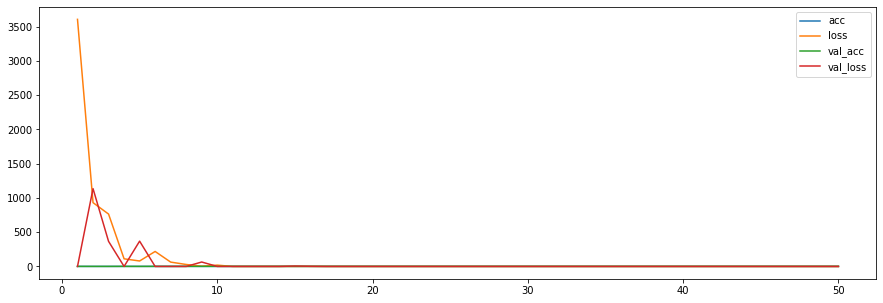

In [ ]:
# 시각화
plt.figure(figsize=(15, 5))

plt.plot(range(1, 51, 1),
         h.history['acc'],
         label='acc'
         )
plt.plot(range(1, 51, 1),
         h.history['loss'],
         label='loss'
         )
plt.plot(range(1, 51, 1),
         h.history['val_acc'],
         label='val_acc'
         )
plt.plot(range(1, 51, 1),
         h.history['val_loss'],
         label='val_loss'
         )
plt.legend()
plt.show()

In [ ]:
# 모델 평가
md.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
opti = optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
model = Sequential()

# Flatten 명령을 통해서 한번에 바로 2차원 이미지 데이터를 1차원으로 펴줌
model.add(Flatten(input_shape=(224, 224))) # 즉 리쉐입이 필요가 없음


# 중간층
model.add(Dense(300, activation="relu"))  # 하나의 층
model.add(Dense(400, activation="relu"))  # 하나의 층
model.add(Dense(300, activation="relu"))  # 하나의 층
model.add(Dense(100, activation="relu"))  # 하나의 층


# 출력층
# 출력층은 회귀의 활성화함수(linear함수, 활성화 함수 생략가능)
# 2진 분류의 활성화함수(sigmoid)
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_63 (Dense)             (None, 300)               15053100  
_________________________________________________________________
dense_64 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_65 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_66 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 101       
Total params: 15,324,001
Trainable params: 15,324,001
Non-trainable params: 0
_________________________________________

In [ ]:
model.compile(loss="mse", optimizer=opti, metrics=["acc"])

In [ ]:
h1 = model.fit(X_train, y_train,
           validation_split=0.2,
           epochs=50, batch_size = 64, verbose = 1)
# validation_split : 자동으로 train데이터에서 검증 데이터를 분리시켜주는 명령
#verbose : 학습 결과의 출력 형태를 설정하는 명령(0: 출력X, 1: bar형태(디폴트), 2:bar가 없는 형태로 출력)
# 주의점 -> 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬돼 있는 데이터에는 사용 불가
# train_test_spllit 명령으로 사전에 랜덤 샘플링을 진행했기 때문에 바로 validation_split 명령 사용 가능!

Epoch 1/50
4/4 [==============================] - 1s 90ms/step - loss: 0.5048 - acc: 0.4961 - val_loss: 0.5469 - val_acc: 0.4531
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.4844 - acc: 0.5156 - val_loss: 0.5469 - val_acc: 0.4531
Epoch 3/50
4/4 [==============================] - 0s 21ms/step - loss: 0.4844 - acc: 0.5156 - val_loss: 0.5469 - val_acc: 0.4531
Epoch 4/50
4/4 [==============================] - 0s 17ms/step - loss: 0.4844 - acc: 0.5156 - val_loss: 0.5469 - val_acc: 0.4531
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 0.4844 - acc: 0.5156 - val_loss: 0.5469 - val_acc: 0.4531
Epoch 6/50
4/4 [==============================] - 0s 21ms/step - loss: 0.4844 - acc: 0.5156 - val_loss: 0.5469 - val_acc: 0.4531
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 0.4844 - acc: 0.5156 - val_loss: 0.5469 - val_acc: 0.4531
Epoch 8/50
4/4 [==============================] - 0s 19ms/step - loss: 0.4844 - acc: 0.5156 - val

In [ ]:
# 모델 평가
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.5125 - acc: 0.4875


[0.512499988079071, 0.48750001192092896]